# Task1: 使用pandas读数据，并给出统计信息,去除空值

In [3]:
import pandas as pd

train = pd.read_csv(r'D:\PycharmProjects\nlp\data\train.csv')
test = pd.read_csv(r'D:\PycharmProjects\nlp\data\test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [5]:
train.describe()

,textID,text,selected_text,sentiment
count,27481,27480,27480,27481
unique,27481,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11118


In [6]:
train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [7]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


# Task 2: 画统计分布图

## Task2.1 按照类别画出统计图

In [8]:
temp = train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)

temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


<Axes: xlabel='sentiment', ylabel='count'>

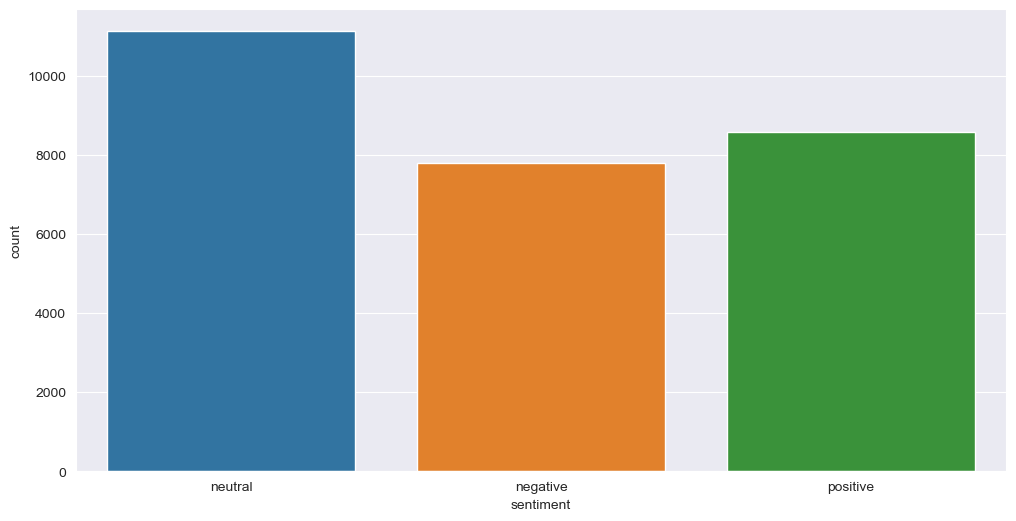

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train)

## Task2.2 统计text和subtext中单词个数

D:\local temp\ipykernel_20244\1489583614.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1=sns.kdeplot(train['Num_words_ST'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
D:\local temp\ipykernel_20244\1489583614.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1=sns.kdeplot(train['Num_word_text'], shade=True, color="b")


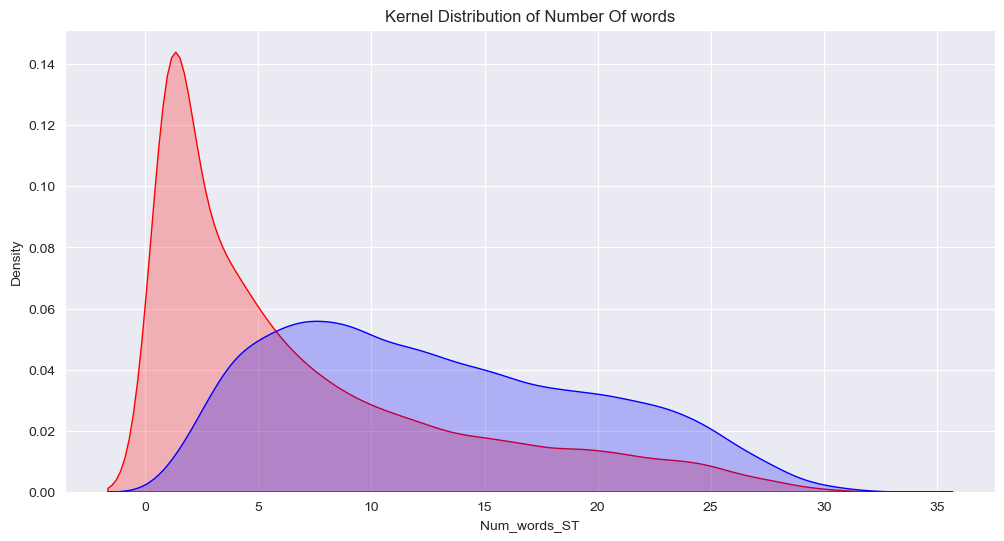

In [10]:
train['Num_words_ST'] = train['selected_text'].apply(lambda x:len(str(x).split())) #Number Of words in Selected Text
train['Num_word_text'] =train['text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
train['difference_in_words'] = train['Num_word_text'] - train['Num_words_ST'] #Difference in Number of words text and Selected Text

plt.figure(figsize=(12,6))
p1=sns.kdeplot(train['Num_words_ST'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p1=sns.kdeplot(train['Num_word_text'], shade=True, color="b")

D:\local temp\ipykernel_20244\3351424355.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1=sns.kdeplot(
D:\local temp\ipykernel_20244\3351424355.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p2=sns.kdeplot(train[train['sentiment']=='negative']['difference_in_words'], shade=True, color="r")


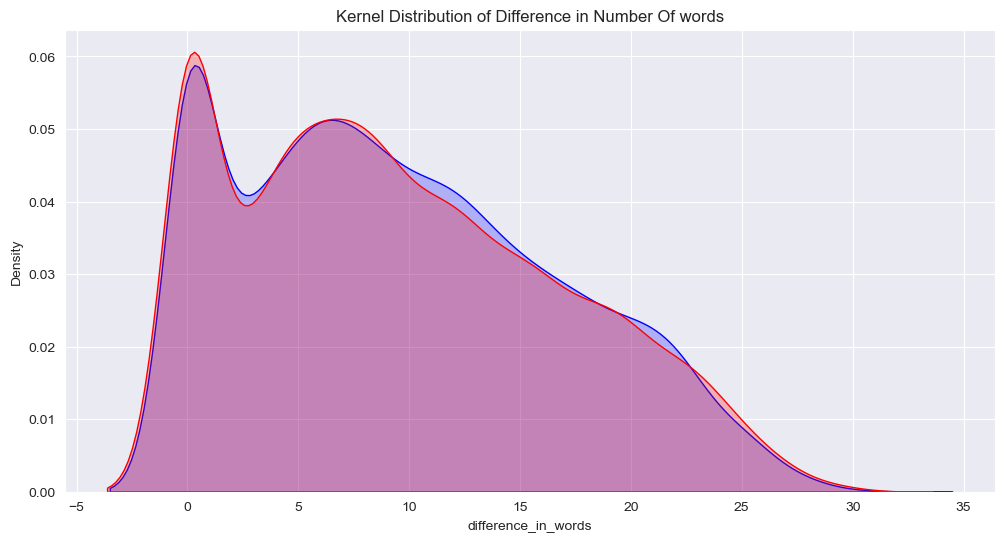

In [11]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(
train[train['sentiment']=='positive']['difference_in_words'],
shade=True, color="b").set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(train[train['sentiment']=='negative']['difference_in_words'], shade=True, color="r")

In [12]:
train['text_n_chars'] = train.text.apply(
    len)  # count all chars in each sentence
train['text_n_words'] = train.text.apply(
    lambda sent: len(sent.split()))  # count number of words in each sentence
train.head()

,textID,text,selected_text,sentiment,Num_words_ST,Num_word_text,difference_in_words,text_n_chars,text_n_words
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,7,7,0,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,2,10,8,46,10
2,088c60f138,my boss is bullying me...,bullying me,negative,2,5,3,25,5
3,9642c003ef,what interview! leave me alone,leave me alone,negative,3,5,2,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,3,14,11,75,14


<Axes: xlabel='text_n_words', ylabel='Count'>

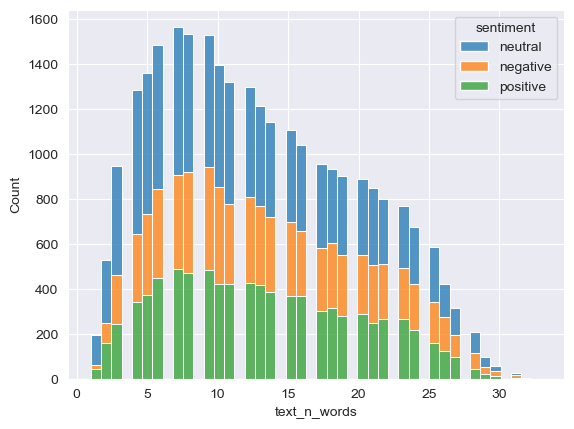

In [13]:
sns.histplot(data=train, x='text_n_words',
             hue='sentiment', multiple='stack')

## Task 2.3 选择单词个数小于一定阈值数据

In [14]:
k = train[train['Num_word_text']<=2]
k[k['sentiment']=='positive']

,textID,text,selected_text,sentiment,Num_words_ST,Num_word_text,difference_in_words,text_n_chars,text_n_words
68,fa2654e730,Chilliin,Chilliin,positive,1,1,0,8,1
80,bbbc46889b,THANK YYYYYYYYYOOOOOOOOOOUUUUU!,THANK YYYYYYYYYOOOOOOOOOOUUUUU!,positive,2,2,0,32,2
170,f3d95b57b1,good morning,good morning,positive,2,2,0,13,2
278,89d5b3f0b5,Thanks,Thanks,positive,1,1,0,8,1
430,a78ef3e0d0,Goodmorning,Goodmorning,positive,1,1,0,11,1
...,...,...,...,...,...,...,...,...,...
26690,e80c242d6a,Goodnight;,Goodnight;,positive,1,1,0,10,1
26726,aad244f37d,*hug*,*hug*,positive,1,1,0,6,1
26843,a46571fe12,congrats!,congrats!,positive,1,1,0,10,1
26960,49a942e9b1,Happy birthday.,Happy birthday.,positive,2,2,0,15,2


# Task 3: 清理语料

## Python正则表达式

正则表达式是**处理字符串**的强大工具，拥有独特的语法和独立的处理引擎。<br>

我们在大文本中匹配字符串时，有些情况用str自带的函数(比如index, find, in)可能可以完成，有些情况会稍稍复杂一些(比如说找出所有“像邮箱”的字符串，所有和xiniuedu/netease相关的句子)，这个时候我们需要一个某种模式的工具，这个时候**正则表达式**就派上用场了。<br>

自然语言处理的各种模型和算法要发挥作用离不开数据，离不开“干净”的数据，而现实生活中的数据形态和干净程度不一，我们经常要做一些数据清洗和信息抽取的工作，这时候正则表达式就可以发挥及其强大的匹配功能了。说起来，正则表达式是一套引擎，并不是Python语言独有的功能或者工具库，下面我们就来了解一下正则表达式吧。

![](http://life.chinaunix.net/bbsfile/forum/month_1012/101218124873e7f28d80d99801.jpg)

### re模块
Python通过re模块提供对正则表达式的支持。

使用re的一般步骤是
* 1.将正则表达式的字符串形式编译为Pattern实例
* 2.使用Pattern实例处理文本并获得匹配结果（一个Match实例）
* 3.使用Match实例获得信息，进行其他的操作。

In [15]:
# encoding: UTF-8
import re
 
# 将正则表达式编译成Pattern对象
pattern = re.compile(r'hello.*\!')
 
# 使用Pattern匹配文本，获得匹配结果，无法匹配时将返回None
match = pattern.match('hello, junjie wang! How are you?')
 
if match:
    # 使用Match获得分组信息
    print(match.group())

hello, junjie wang!


#### re.compile(strPattern[, flag]):

这个方法是Pattern类的工厂方法，用于将字符串形式的正则表达式编译为Pattern对象。 

第二个参数flag是匹配模式，取值可以使用按位或运算符'|'表示同时生效，比如re.I | re.M。

当然，你也可以在regex字符串中指定模式，比如**re.compile('pattern', re.I | re.M)**等价于**re.compile('(?im)pattern')** 

flag可选值有：

* re.I(re.IGNORECASE): 忽略大小写（括号内是完整写法，下同）
* re.M(MULTILINE): 多行模式，改变'^'和'$'的行为（参见上图）
* re.S(DOTALL): 点任意匹配模式，改变'.'的行为
* re.L(LOCALE): 使预定字符类 \w \W \b \B \s \S 取决于当前区域设定
* re.U(UNICODE): 使预定字符类 \w \W \b \B \s \S \d \D 取决于unicode定义的字符属性
* re.X(VERBOSE): 详细模式。这个模式下正则表达式可以是多行，忽略空白字符，并可以加入注释。以下两个正则表达式是等价的：

### Pattern

Pattern对象是一个编译好的正则表达式，通过Pattern提供的一系列方法可以对文本进行匹配查找。

Pattern不能直接实例化，必须使用re.compile()进行构造。

Pattern提供了几个可读属性用于获取表达式的相关信息：
* pattern: 编译时用的表达式字符串。
* flags: 编译时用的匹配模式。数字形式。
* groups: 表达式中分组的数量。
* groupindex: 以表达式中有别名的组的别名为键、以该组对应的编号为值的字典，没有别名的组不包含在内。


* **sub(repl, string[, count]) | re.sub(pattern, repl, string[, count]): **
    * 使用repl替换string中每一个匹配的子串后返回替换后的字符串。 
        * 当repl是一个字符串时，可以使用\id或\g<id>、\g<name>引用分组，但不能使用编号0。 
        * 当repl是一个方法时，这个方法应当只接受一个参数（Match对象），并返回一个字符串用于替换（返回的字符串中不能再引用分组）。 
count用于指定最多替换次数，不指定时全部替换。

In [16]:
import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [17]:
train['text'] = train['text'].apply(lambda x:clean_text(x))
train['selected_text'] = train['selected_text'].apply(lambda x:clean_text(x))

In [18]:
from collections import Counter

train['temp_list'] = train['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,i,7200
1,to,5305
2,the,4590
3,a,3538
4,my,2783
5,you,2624
6,and,2321
7,it,2158
8,is,2115
9,in,1986


In [19]:
Positive_sent = train[train['sentiment']=='positive']
Negative_sent = train[train['sentiment']=='negative']
Neutral_sent = train[train['sentiment']=='neutral']

#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] 
               for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,i,1040
1,good,826
2,happy,730
3,love,697
4,you,623
5,to,608
6,a,589
7,the,571
8,day,456
9,thanks,439


In [20]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,to,594
2,the,547
3,my,524
4,a,472
5,im,452
6,not,407
7,is,373
8,so,360
9,miss,358
10,sad,343


In [21]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,to,4103
2,the,3472
3,a,2477
4,my,1971
5,and,1800
6,you,1760
7,in,1574
8,it,1476
9,is,1470
10,for,1406


# Task 4: 转化标签

In [22]:
train['label'] = train.sentiment.map({'negative': 0,
                                                'positive': 1,
                                                'neutral': 2})
train.head()

,textID,text,selected_text,sentiment,Num_words_ST,Num_word_text,difference_in_words,text_n_chars,text_n_words,temp_list,label
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,7,7,0,36,7,"[id, have, responded, if, i, were, going]",2
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,2,10,8,46,10,"[sooo, sad]",0
2,088c60f138,my boss is bullying me,bullying me,negative,2,5,3,25,5,"[bullying, me]",0
3,9642c003ef,what interview leave me alone,leave me alone,negative,3,5,2,31,5,"[leave, me, alone]",0
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,3,14,11,75,14,"[sons, of]",0


# Task 5: 词云

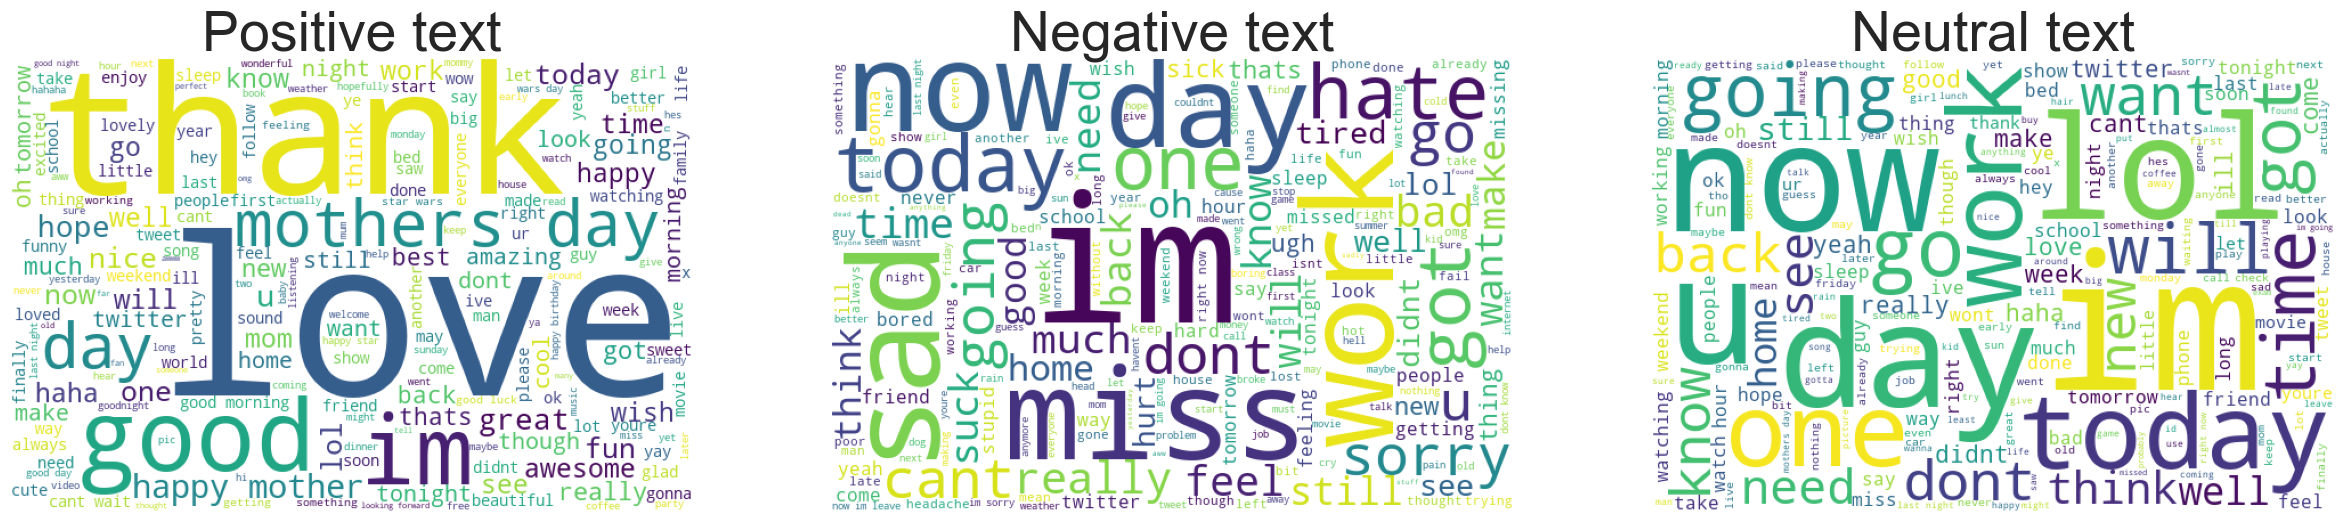

In [23]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

neutral_text_clean = train[train['sentiment' ] == 'neutral']['text']
neutral_clean_words = [word for words in neutral_text_clean for word in words.split()]
neutral_clean_words[:10]

negative_text_clean = train[train['sentiment' ] == 'negative']['text']
negative_clean_words = [word for words in negative_text_clean for word in words.split()]
negative_clean_words[:10]

positive_text_clean = train[train['sentiment' ] == 'positive']['text']
positive_clean_words = [word for words in positive_text_clean for word in words.split()]
positive_clean_words[:10]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(positive_clean_words))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive text',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(negative_clean_words))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative text',fontsize=40);

wordcloud3 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(neutral_clean_words))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutral text',fontsize=40);
